In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import keras
from keras.utils import to_categorical
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score #precision_recall_fscore_support(y_test, model5_pred)
from sklearn.metrics import classification_report

In [3]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [3]:
test_sizes = [0.15, 0.2, 0.25, 0.3, 0.35]

In [4]:
data, columns = parse_arff('./Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

In [6]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = [1, 2, 3, 4, 5] # regularization parameter
degree = [1, 2, 3, 4, 5, 6] # polinomial degree
gamma = ['scale', 'auto']
decision_function_shape = ['ovo', 'ovr']

In [7]:
losses = ['hinge', 'squared_hinge']
penalty = ['l2']
C = [1, 2, 3, 4, 5] # regularization parameter
multi_class = ['ovr', 'crammer_singer']

In [8]:
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

In [9]:
max_features = [None, 'auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']
class_weight = [None, 'balanced', 'balanced_subsample']
warm_start = [True, False]
splitter = ['best', 'random']
bootstrap  = [True, False]

In [10]:
alpha = [0,1.,2.,3.,4.,5.,7.,9.,11.]
binarize = [0,1.,2.,3.,4.,5.,7.,9.,11.] #BernoulliNB
fit_prior = [True, False]

In [12]:
svc = []
lsvc = []
knn = []
bnb = []
randomforest = []
dtree = []
svc_pred = []
lsvc_pred = []
knn_pred = []
bnb_pred = []
randomforest_pred = []
dtree_pred = []
y_true = []
x_true = []

In [14]:
for size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = size)
    x_train = np.array(x_train).astype(np.int8)
    y_train = np.array(y_train).astype(np.int8)
    x_test = np.array(x_test).astype(np.int8)
    y_test = np.array(y_test).astype(np.int8)
    y_train = np.where(y_train == -1, 0, y_train)
    y_test = np.where(y_test == -1, 0, y_test)
    y_true.append(y_test)
    x_true.append(x_test)
    ###############################################
    for kernel in kernels:
        for c in C:
            for deg in degree:
                for gam in gamma:
                    for decision in decision_function_shape:
                        pred = SVC(kernel = kernel, C = c, degree = deg, gamma = gam, decision_function_shape=decision).fit(x_train, y_train).predict(x_test)
                        svc_pred.append(pred)
                        svc.append(accuracy_score(y_test, pred))
    ###############################################
    for loss in losses:
        for c in C:
            for multi in multi_class:
                pred = LinearSVC(loss = loss, penalty = 'l2', C = c, multi_class = multi).fit(x_train, y_train).predict(x_test)
                lsvc_pred.append(pred)
                lsvc.append(accuracy_score(y_test, pred))
    ###############################################
    for k in range(1, 11):
        for weight in weights:
            for algo in algorithm:
                for m in metric:
                    pred = KNeighborsClassifier(n_neighbors=k, weights = weight, algorithm = algo, metric=m).fit(x_train, y_train).predict(x_test)
                    knn_pred.append(pred)
                    knn.append(accuracy_score(y_test, pred))
    ###############################################
    for a in alpha:
        for b in binarize:
            for fit in fit_prior:
                pred = BernoulliNB(alpha = a, binarize = b, fit_prior = fit).fit(x_train, y_train).predict(x_test)
                bnb_pred.append(pred)
                bnb.append(accuracy_score(y_test, pred))
    ###############################################    
    for weight in class_weight:
        for maxx in max_features:
            for cri in criterion:
                for s in warm_start:
                    pred = RandomForestClassifier(warm_start = s, class_weight=weight, max_features = maxx, criterion = cri).fit(x_train, y_train).predict(x_test)
                    randomforest_pred.append(pred)
                    randomforest.append(accuracy_score(y_test, pred))
    ###############################################    
    for weight in class_weight[:-1]:
        for maxx in max_features:
            for cri in criterion:
                for split in splitter:
                    pred = DecisionTreeClassifier(class_weight = weight, max_features=maxx, splitter = split, criterion = cri).fit(x_train, y_train).predict(x_test)
                    dtree_pred.append(pred)
                    dtree.append(accuracy_score(y_test, pred))

c:\users\ahmet usta\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\ahmet usta\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\ahmet usta\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\ahmet usta\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\ahmet u

In [15]:
svcmaxindex = np.argmax(svc)
lsvcmaxindex = np.argmax(lsvc)
knnmaxindex = np.argmax(knn)
bnbmaxindex = np.argmax(bnb)
randomforestmaxindex = np.argmax(randomforest)
dtreemaxindex = np.argmax(dtree)
##############
svctextindex = 0
lsvctextindex = 0
knntextindex = 0
bnbtextindex = 0
randomforesttextindex = 0
dtreetextindex = 0
###############
if svcmaxindex < (len(svc)/5):
    svctextindex = 0
elif svcmaxindex < (len(svc)/5)*2:
    svctextindex = 1
elif svcmaxindex < (len(svc)/5)*3:
    svctextindex = 2
elif svcmaxindex < (len(svc)/5)*4:
    svctextindex = 3
else:
    svctextindex = 4
###########
if lsvcmaxindex < (len(lsvc)/5):
    lsvctextindex = 0
elif lsvcmaxindex < (len(lsvc)/5)*2:
    lsvctextindex = 1
elif lsvcmaxindex < (len(lsvc)/5)*3:
    lsvctextindex = 2
elif lsvcmaxindex < (len(lsvc)/5)*4:
    lsvctextindex = 3
else:
    lsvctextindex = 4
#################
if knnmaxindex < (len(knn)/5):
    knntextindex = 0
elif knnmaxindex < (len(knn)/5)*2:
    knntextindex = 1
elif knnmaxindex < (len(knn)/5)*3:
    knntextindex = 2
elif knnmaxindex < (len(knn)/5)*4:
    knntextindex = 3
else:
    knntextindex = 4
################
if bnbmaxindex < (len(bnb)/5):
    bnbtextindex = 0
elif bnbmaxindex < (len(bnb)/5)*2:
    bnbtextindex = 1
elif bnbmaxindex < (len(bnb)/5)*3:
    bnbtextindex = 2
elif bnbmaxindex < (len(bnb)/5)*4:
    bnbtextindex = 3
else:
    bnbtextindex = 4
#############
if randomforestmaxindex < (len(randomforest)/5):
    randomforesttextindex = 0
elif randomforestmaxindex < (len(randomforest)/5)*2:
    randomforesttextindex = 1
elif randomforestmaxindex < (len(randomforest)/5)*3:
    randomforesttextindex = 2
elif randomforestmaxindex < (len(randomforest)/5)*4:
    randomforesttextindex = 3
else:
    randomforesttextindex = 4
################
if dtreemaxindex < (len(dtree)/5):
    dtreetextindex = 0
elif dtreemaxindex < (len(dtree)/5)*2:
    dtreetextindex = 1
elif dtreemaxindex < (len(dtree)/5)*3:
    dtreetextindex = 2
elif dtreemaxindex < (len(dtree)/5)*4:
    dtreetextindex = 3
else:
    dtreetextindex = 4

In [16]:
svctextindex,lsvctextindex,knntextindex,bnbtextindex,randomforesttextindex,dtreetextindex

(1, 4, 2, 4, 0, 0)

In [17]:
('svc', np.argmax(svc), svc[np.argmax(svc)]), ('lsvc', np.argmax(lsvc), lsvc[np.argmax(lsvc)]), ('knn', np.argmax(knn), knn[np.argmax(knn)]), ('bnb', np.argmax(bnb), bnb[np.argmax(bnb)]), ('randomforest', np.argmax(randomforest), randomforest[np.argmax(randomforest)]), ('dtree', np.argmax(dtree), dtree[np.argmax(dtree)])

(('svc', 688, 0.9698613622664256),
 ('lsvc', 108, 0.9322997416020672),
 ('knn', 641, 0.9685238784370478),
 ('bnb', 649, 0.9082687338501292),
 ('randomforest', 14, 0.9789029535864979),
 ('dtree', 8, 0.9710669077757685))

In [18]:
('svc', np.argmin(svc), svc[np.argmin(svc)]), ('lsvc', np.argmin(lsvc), lsvc[np.argmin(lsvc)]), ('knn', np.argmin(knn), knn[np.argmin(knn)]), ('bnb', np.argmin(bnb), bnb[np.argmin(bnb)]), ('randomforest', np.argmin(randomforest), randomforest[np.argmin(randomforest)]), ('dtree', np.argmin(dtree), dtree[np.argmin(dtree)])

(('svc', 2328, 0.8170033162496232),
 ('lsvc', 60, 0.912807525325615),
 ('knn', 1254, 0.6768164003617727),
 ('bnb', 488, 0.5507989146819415),
 ('randomforest', 129, 0.9641823444283647),
 ('dtree', 157, 0.9341085271317829))

[[704  20]
 [ 30 905]]
accuracy :  0.9698613622664256
f1 :  0.9731182795698924
precision :  0.9783783783783784
recall :  0.9679144385026738
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       724
           1       0.98      0.97      0.97       935

    accuracy                           0.97      1659
   macro avg       0.97      0.97      0.97      1659
weighted avg       0.97      0.97      0.97      1659



<AxesSubplot:>

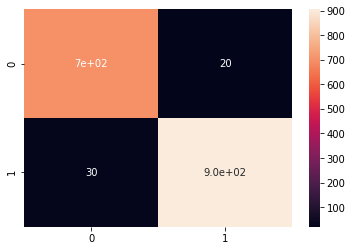

In [19]:
cm_svc = confusion_matrix(y_true[svctextindex], svc_pred[svcmaxindex])
print(cm_svc)
print("accuracy : ", str(accuracy_score(y_true[svctextindex], svc_pred[svcmaxindex])))
print("f1 : ", str(f1_score(y_true[svctextindex], svc_pred[svcmaxindex])))
print("precision : ", str(precision_score(y_true[svctextindex], svc_pred[svcmaxindex])))
print("recall : ", str(recall_score(y_true[svctextindex], svc_pred[svcmaxindex])))
print(str(classification_report(y_true[svctextindex], svc_pred[svcmaxindex])))
sns.heatmap(cm_svc, annot=True)

[[1511  156]
 [ 106 2097]]
accuracy :  0.9322997416020672
f1 :  0.9412028725314184
precision :  0.9307589880159787
recall :  0.9518837948252383
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1667
           1       0.93      0.95      0.94      2203

    accuracy                           0.93      3870
   macro avg       0.93      0.93      0.93      3870
weighted avg       0.93      0.93      0.93      3870



<AxesSubplot:>

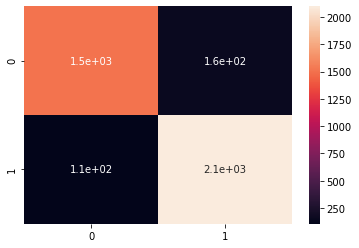

In [27]:
cm_lsvc = confusion_matrix(y_true[5], lsvc_pred[lsvcmaxindex])
print(cm_lsvc)
print("accuracy : ", str(accuracy_score(y_true[5], lsvc_pred[lsvcmaxindex])))
print("f1 : ", str(f1_score(y_true[5], lsvc_pred[lsvcmaxindex])))
print("precision : ", str(precision_score(y_true[5], lsvc_pred[lsvcmaxindex])))
print("recall : ", str(recall_score(y_true[5], lsvc_pred[lsvcmaxindex])))
print(str(classification_report(y_true[5], lsvc_pred[lsvcmaxindex])))
sns.heatmap(cm_lsvc, annot=True)

[[1164   63]
 [  45 1492]]
accuracy :  0.9609261939218524
f1 :  0.9650711513583441
precision :  0.9594855305466238
recall :  0.970722186076773
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1227
           1       0.96      0.97      0.97      1537

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



<AxesSubplot:>

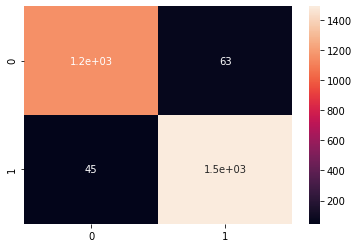

In [33]:
cm_knn = confusion_matrix(y_true[3], knn_pred[knnmaxindex])
print(cm_knn)
print("accuracy : ", str(accuracy_score(y_true[3], knn_pred[knnmaxindex])))
print("f1 : ", str(f1_score(y_true[3], knn_pred[knnmaxindex])))
print("precision : ", str(precision_score(y_true[3], knn_pred[knnmaxindex])))
print("recall : ", str(recall_score(y_true[3], knn_pred[knnmaxindex])))
print(str(classification_report(y_true[3], knn_pred[knnmaxindex])))
sns.heatmap(cm_knn, annot=True)

[[1507  160]
 [ 195 2008]]
accuracy :  0.9082687338501292
f1 :  0.9187828872111645
precision :  0.9261992619926199
recall :  0.911484339536995
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1667
           1       0.93      0.91      0.92      2203

    accuracy                           0.91      3870
   macro avg       0.91      0.91      0.91      3870
weighted avg       0.91      0.91      0.91      3870



<AxesSubplot:>

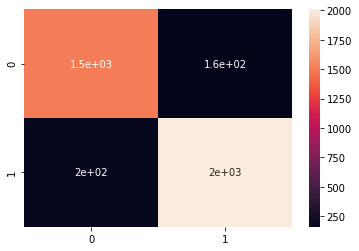

In [41]:
cm_bnb = confusion_matrix(y_true[5], bnb_pred[bnbmaxindex])
print(cm_bnb)
print("accuracy : ", str(accuracy_score(y_true[5], bnb_pred[bnbmaxindex])))
print("f1 : ", str(f1_score(y_true[5], bnb_pred[bnbmaxindex])))
print("precision : ", str(precision_score(y_true[5], bnb_pred[bnbmaxindex])))
print("recall : ", str(recall_score(y_true[5], bnb_pred[bnbmaxindex])))
print(str(classification_report(y_true[5], bnb_pred[bnbmaxindex])))
sns.heatmap(cm_bnb, annot=True)

[[335 420]
 [380 524]]
accuracy :  0.517781796262809
f1 :  0.5670995670995671
precision :  0.5550847457627118
recall :  0.5796460176991151
              precision    recall  f1-score   support

           0       0.47      0.44      0.46       755
           1       0.56      0.58      0.57       904

    accuracy                           0.52      1659
   macro avg       0.51      0.51      0.51      1659
weighted avg       0.52      0.52      0.52      1659



<AxesSubplot:>

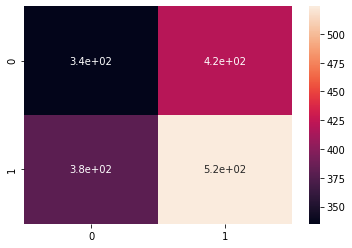

In [53]:
cm_random = confusion_matrix(y_true[randomforesttextindex], randomforest_pred[randomforestmaxindex])
print(cm_random)
print("accuracy : ", str(accuracy_score(y_true[randomforesttextindex], randomforest_pred[randomforestmaxindex])))
print("f1 : ", str(f1_score(y_true[randomforesttextindex], randomforest_pred[randomforestmaxindex])))
print("precision : ", str(precision_score(y_true[randomforesttextindex], randomforest_pred[randomforestmaxindex])))
print("recall : ", str(recall_score(y_true[randomforesttextindex], randomforest_pred[randomforestmaxindex])))
print(str(classification_report(y_true[randomforesttextindex], randomforest_pred[randomforestmaxindex])))
sns.heatmap(cm_random, annot=True)

[[337 418]
 [383 521]]
accuracy :  0.5171790235081374
f1 :  0.5653825284861638
precision :  0.5548455804046858
recall :  0.5763274336283186
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       755
           1       0.55      0.58      0.57       904

    accuracy                           0.52      1659
   macro avg       0.51      0.51      0.51      1659
weighted avg       0.52      0.52      0.52      1659



<AxesSubplot:>

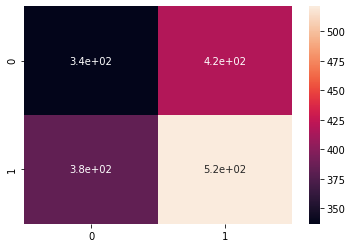

In [54]:
cm_dtree = confusion_matrix(y_true[dtreetextindex], dtree_pred[dtreemaxindex])
print(cm_dtree)
print("accuracy : ", str(accuracy_score(y_true[dtreetextindex], dtree_pred[dtreemaxindex])))
print("f1 : ", str(f1_score(y_true[dtreetextindex], dtree_pred[dtreemaxindex])))
print("precision : ", str(precision_score(y_true[dtreetextindex], dtree_pred[dtreemaxindex])))
print("recall : ", str(recall_score(y_true[dtreetextindex], dtree_pred[dtreemaxindex])))
print(str(classification_report(y_true[dtreetextindex], dtree_pred[dtreemaxindex])))
sns.heatmap(cm_dtree, annot=True)

In [55]:
#### average accuracy
np.sum(svc)/len(svc),np.sum(lsvc)/len(lsvc),np.sum(knn)/len(knn),np.sum(bnb)/len(bnb),np.sum(randomforest)/len(randomforest),np.sum(dtree)/len(dtree)

(0.913948194349541,
 0.9220245583443895,
 0.9218968472709298,
 0.597889700835735,
 0.9709171668712021,
 0.9577447430339525)

In [90]:
svc_acc = svc[(svctextindex-1)*480:(svctextindex)*480]
lsvc_acc = lsvc[(4)*20:(5)*20]
knn_acc = knn[2*320:3*320]
bnb_acc = bnb[4*162:5*162]
forest_acc = randomforest[0:48]
dtree_acc = dtree[0:32]

In [84]:
svctextindex

1

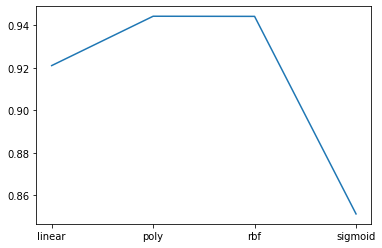

In [91]:
svckernelacc = [(np.sum(svc_acc[i*120:(i+1)*120])/120) for i in range(len(kernels))]
plt.plot(kernels, svckernelacc)
plt.show()

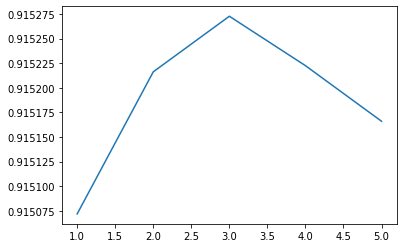

In [92]:
svcC1 = 0
svcC2 = 0
svcC3 = 0
svcC4 = 0
svcC5 = 0
for i in range(96):
    svcC1 += svc_acc[(i*5)]
    svcC2 += svc_acc[(i*5)+1]       
    svcC3 += svc_acc[(i*5)+2]
    svcC4 += svc_acc[(i*5)+3]
    svcC5 += svc_acc[(i*5)+4]

svcC1 = np.sum(svcC1) / 96
svcC2 = np.sum(svcC2) / 96
svcC3 = np.sum(svcC3) / 96
svcC4 = np.sum(svcC4) / 96
svcC5 = np.sum(svcC5) / 96
plt.plot([1,2,3,4,5], [svcC1, svcC2, svcC3, svcC4, svcC5])
plt.show()

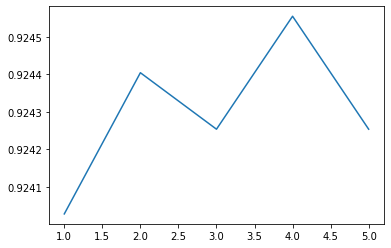

In [93]:
lsvcC1 = (sum(lsvc_acc[:2]) + sum(lsvc_acc[10:12])) / 4
lsvcC2 = (sum(lsvc_acc[2:4]) + sum(lsvc_acc[12:14])) / 4
lsvcC3 = (sum(lsvc_acc[4:6]) + sum(lsvc_acc[14:16])) / 4
lsvcC4 = (sum(lsvc_acc[6:8]) + sum(lsvc_acc[16:18])) / 4
lsvcC5 = (sum(lsvc_acc[8:10]) + sum(lsvc_acc[18:])) / 4

plt.plot([1,2,3,4,5], [lsvcC1, lsvcC2, lsvcC3, lsvcC4, lsvcC5])
plt.show()

In [89]:
len(lsvc)

120

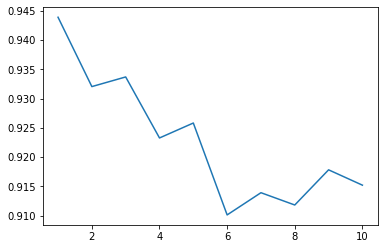

In [94]:
k1acc, k2acc, k3acc, k4acc, k5acc, k6acc, k7acc, k8acc, k9acc, k10acc = np.sum(knn_acc[:32])/32, np.sum(knn_acc[32:64])/32, np.sum(knn_acc[64:96])/32, np.sum(knn_acc[96:128])/32, np.sum(knn_acc[128:160])/32, np.sum(knn_acc[160:192])/32, np.sum(knn_acc[192:224])/32, np.sum(knn_acc[224:256])/32,np.sum(knn_acc[256:288])/32,np.sum(knn_acc[288:320])/32
plt.plot(range(1, 11), [k1acc, k2acc, k3acc, k4acc, k5acc, k6acc, k7acc, k8acc, k9acc, k10acc])
plt.show()

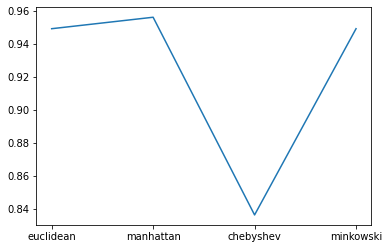

In [95]:
euclidean = 0
manhattan = 0
chebyshev = 0
minkowski = 0
for i in range(80):
    euclidean += knn_acc[(i*4)]
    manhattan += knn_acc[(i*4)+1]       
    chebyshev += knn_acc[(i*4)+2]
    minkowski += knn_acc[(i*4)+3]

plt.plot(metric, [euclidean/80, manhattan/80, chebyshev/80, minkowski/80])
plt.show()

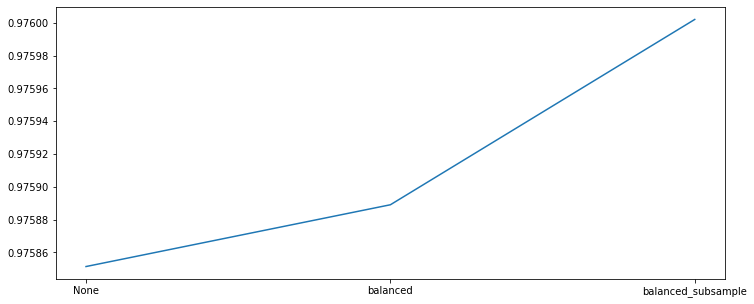

In [96]:
weightacc = []
for i in range(3):
    weightacc.append(np.sum(forest_acc[i*16:(i+1)*16])/16)

plt.figure(figsize=(12,5))
plt.plot(['None', 'balanced', 'balanced_subsample'], weightacc)
plt.show()

In [81]:
forest_acc

[]

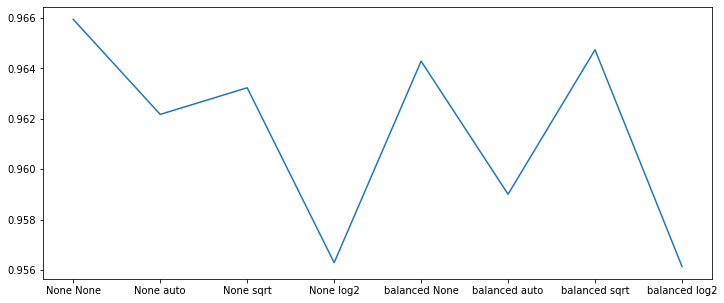

In [97]:
weightaccdecision = []
for i in range(8):
    weightaccdecision.append(np.sum(dtree_acc[i*4:(i+1)*4])/4)


plt.figure(figsize=(12,5))
plt.plot(['None None', 'None auto', 'None sqrt', 'None log2', 'balanced None', 'balanced auto', 'balanced sqrt', 'balanced log2'], weightaccdecision)
plt.show()

In [18]:
i = 0
for k in range(1, 11):
    for weight in weights:
        for algo in algorithm:
            for m in metric:
                if i == 154:
                    print(str(k), weight, algo, m)
                i+=1

5 distance kd_tree chebyshev


In [34]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.25)
pred = KNeighborsClassifier(n_neighbors=1, weights = 'distance', algorithm = 'kd_tree', metric='manhattan').fit(x_train, y_train).predict(x_test)

In [35]:
accuracy_score(y_test, pred)

0.9602026049204052

In [ ]:
(('svc', 2328, 0.8170033162496232),
 ('lsvc', 60, 0.912807525325615),
 ('knn', 1254, 0.6768164003617727),
 ('bnb', 488, 0.5507989146819415),
 ('randomforest', 129, 0.9641823444283647),
 ('dtree', 157, 0.9341085271317829))

(('svc', 688, 0.9698613622664256),
 ('lsvc', 108, 0.9322997416020672),
 ('knn', 641, 0.9685238784370478),
 ('bnb', 649, 0.9082687338501292),
 ('randomforest', 14, 0.9789029535864979),
 ('dtree', 8, 0.9710669077757685))

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [18]:
clf = SVC(kernel='rbf', C=1, degree=2, gamma = 'scale', decision_function_shape='ovo')
scores = cross_val_score(clf, df[df.columns[:-1]], df[df.columns[-1]], cv=10)

In [20]:
#kernel: RBF, C: 1, degree: 2, gamma: scale, DFS: ovo"
scores, np.sum(scores)/len(scores)

(array([0.94846293, 0.94755877, 0.95117541, 0.94665461, 0.94846293,
        0.95927602, 0.94751131, 0.92941176, 0.95022624, 0.94570136]),
 0.9474441344210518)

In [23]:
clf = RandomForestClassifier(max_features= 'auto', criterion= 'gini', class_weight='balanced_subsample', warm_start=True)
scores = cross_val_score(clf, df[df.columns[:-1]], df[df.columns[-1]], cv=10)
#max features: auto, criterion: gini, class weight: balanced subsample, warm start: true
scores, np.sum(scores)/len(scores)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set ta

(array([0.98553345, 0.98462929, 0.97287523, 0.98462929, 0.98282098,
        0.97375566, 0.96470588, 0.95565611, 0.95927602, 0.96108597]),
 0.9724967883940334)

In [28]:
clf = LinearSVC(loss='squared_hinge', penalty='l2', C=1, multi_class='ovr')
scores = cross_val_score(clf, df[df.columns[:-1]], df[df.columns[-1]], cv=10)
#losses: squared hinge, penalty: L2, C: 1, multi class: ovr
scores, np.sum(scores)/len(scores)

(array([0.92585895, 0.92766727, 0.92676311, 0.93309222, 0.92676311,
        0.93936652, 0.9239819 , 0.90950226, 0.92307692, 0.92941176]),
 0.9265484031976958)

In [29]:
clf = DecisionTreeClassifier(max_features='log2', criterion='entropy', splitter= 'random')
scores = cross_val_score(clf, df[df.columns[:-1]], df[df.columns[-1]], cv=10)
#max features: log2, criterion: entropy, splitter: random
scores, np.sum(scores)/len(scores)

(array([0.98372514, 0.98372514, 0.97016275, 0.98462929, 0.97197107,
        0.95022624, 0.91945701, 0.92579186, 0.92488688, 0.93484163]),
 0.9549417001464656)

In [36]:
clf = KNeighborsClassifier(5, weights='distance', algorithm='auto', metric='manhattan')
scores = cross_val_score(clf, df[df.columns[:-1]], df[df.columns[-1]], cv=10)
#K: 5, weights: distance, algorithm: auto, metric: manhattan
scores, np.sum(scores)/len(scores)

(array([0.98553345, 0.98462929, 0.96835443, 0.98372514, 0.97739602,
        0.96742081, 0.94298643, 0.9438914 , 0.94932127, 0.960181  ]),
 0.9663439241324573)

In [37]:
clf = BernoulliNB(alpha=0, binarize=0, fit_prior=False)
scores = cross_val_score(clf, df[df.columns[:-1]], df[df.columns[-1]], cv=10)
#alpha: 0, binarize: 0, fit prior: false
scores, np.sum(scores)/len(scores)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
c:\users\hp\

(array([0.90506329, 0.90506329, 0.8915009 , 0.91500904, 0.90506329,
        0.91945701, 0.91040724, 0.87782805, 0.9040724 , 0.90678733]),
 0.9040251855367268)

In [38]:
clf = GaussianNB()
scores = cross_val_score(clf, df[df.columns[:-1]], df[df.columns[-1]], cv=10)
#alpha: 0, binarize: 0, fit prior: false
scores, np.sum(scores)/len(scores)

(array([0.60036166, 0.59403255, 0.61301989, 0.59041591, 0.62025316,
        0.60633484, 0.60995475, 0.62171946, 0.58642534, 0.59638009]),
 0.6038897662278153)

In [ ]:
max_features = [None, 'auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']
class_weight = [None, 'balanced', 'balanced_subsample']
warm_start = [True, False]
splitter = ['best', 'random']
bootstrap  = [True, False]

In [49]:
clf = DecisionTreeClassifier(class_weight=None, max_features=None, criterion='entropy', splitter= 'best')
scores = cross_val_score(clf, df[df.columns[:-1]], df[df.columns[-1]], cv=10)
#class_weight=None, max_features=None, criterion='entropy', splitter= 'best'
scores, np.sum(scores)/len(scores)

(array([0.98643761, 0.98462929, 0.97106691, 0.98462929, 0.97649186,
        0.97013575, 0.94117647, 0.93574661, 0.94841629, 0.94479638]),
 0.9643526466087895)